# Assignment 5
Done by:
- Saumili Jana: 20ME10075
- Ushasi Das: 20EC10086
- Jaya Kishnani: 20EC30020
- Karthikeyan.R: 20EC30024

In [68]:
#importing modules
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [69]:
#opening the file and extracting the data
file = open("S_n_I_A_N_P_An_Io_noaa2.txt","r")
lines = file.readlines()
dataset = []
for x in lines:
    dataset.append(x.split()[1:8])
file.close()

#print(dataset)



In [70]:
#separating into feature vectors and labels
x = []
y = []
for i in dataset:
    x.append([i[0],i[2],i[3],i[4],i[5],i[6]])
    y.append(i[1])
print(x[0])
print(y[0])



['0.167651', '0.48401', '0.000837464', '1.0841', '0.560382', '-0.295856']
10.2438


In [71]:
#Separating all the different months
x_may = []
x_june = []
x_july = []
x_aug = []
x_sep = []
x_oct = []

y_may = []
y_june = []
y_july = []
y_aug = []
y_sep = []
y_oct = []

for i in range(0,len(x),6):
    x_may.append(x[i])
    x_june.append(x[i+1])
    x_july.append(x[i+2])
    x_aug.append(x[i+3])
    x_sep.append(x[i+4])
    x_oct.append(x[i+5])

for j in range (0,len(y),6):
    y_may.append(y[j])
    y_june.append(y[j+1])
    y_july.append(y[j+2])
    y_aug.append(y[j+3])
    y_sep.append(y[j+4])
    y_oct.append(y[j+5])


In [72]:
#Converting to numpy arrays
X_may = np.float32(np.asarray(x_may))
Y_may = np.float32(np.asarray(y_may))

X_june = np.float32(np.asarray(x_june))
Y_june = np.float32(np.asarray(y_june))

X_july = np.float32(np.asarray(x_july))
Y_july = np.float32(np.asarray(y_july))

X_aug = np.float32(np.asarray(x_aug))
Y_aug = np.float32(np.asarray(y_aug))

X_sep = np.float32(np.asarray(x_sep))
Y_sep = np.float32(np.asarray(y_sep))

X_oct = np.float32(np.asarray(x_oct))
Y_oct = np.float32(np.asarray(y_oct))

### Creating the combined dataset


In [73]:
#for lag 0:
X_0 = np.concatenate((X_may,X_june, X_july, X_aug, X_sep, X_oct),axis=0)
Y_0 = np.concatenate((Y_may,Y_june, Y_july, Y_aug, Y_sep, Y_oct),axis=0)

#print(X_0)
#print(Y_0)

#splitting data into training and test data
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, Y_0, test_size = 0.1) 

In [74]:
#for lag 1:
X_1 = np.concatenate((X_may,X_june, X_july, X_aug, X_sep),axis=0)
Y_1 = np.concatenate((Y_june, Y_july, Y_aug, Y_sep, Y_oct),axis=0)
#splitting data into training and test data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1, test_size = 0.1) 

In [75]:
#for lag 2:
X_2 = np.concatenate((X_may,X_june, X_july, X_aug),axis=0)
Y_2 = np.concatenate((Y_july, Y_aug, Y_sep, Y_oct),axis=0)
#splitting data into training and test data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, Y_2, test_size = 0.1) 

## Using Xgboost regresssor

In [76]:
#importing modules
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import numpy as np
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RepeatedKFold


In [77]:
rgr = XGBRegressor(n_estimators=8, max_depth=6, eta=0.1, subsample=1, colsample_bytree=1)

In [78]:
#lag 0
rgr = rgr.fit(X_train_0, y_train_0)
y_pred_0 = rgr.predict(X_test_0)
rmse_0=np.sqrt(mean_squared_error(y_pred_0,y_test_0))#root mean square error
#lag 1
rgr = rgr.fit(X_train_1, y_train_1)
y_pred_1 = rgr.predict(X_test_1)
rmse_1=np.sqrt(mean_squared_error(y_pred_1,y_test_1))#root mean square error
#lag 2
rgr = rgr.fit(X_train_2, y_train_2)
y_pred_2 = rgr.predict(X_test_2)
rmse_2=np.sqrt(mean_squared_error(y_pred_2,y_test_2))#root mean square error
print("RMSE: %0.2f"%((rmse_0)))
print("RMSE: %0.2f"%((rmse_1)))
print("RMSE: %0.2f"%((rmse_2)))

RMSE: 30.57
RMSE: 35.20
RMSE: 39.13


In [84]:
#printing in a table format
print('Lag 0: Root mean square error =', rmse_0,'\n=======================================================================')
cols = ['true ISMR values', 'predicted ISMR values']
d = (np.column_stack((y_test_0,y_pred_0)))
(r,c) = np.shape(d)
index=list(range(0, r))
df = pd.DataFrame(d,index,cols)
print(df)
print('Lag 1: Root mean square error =', rmse_1,'\n=======================================================================')
d = (np.column_stack((y_test_1,y_pred_1)))
(r,c) = np.shape(d)
index=list(range(0, r))
df = pd.DataFrame(d,index,cols)
print(df)
print('Lag 2: Root mean square error =', rmse_2,'\n=======================================================================')
d = (np.column_stack((y_test_2,y_pred_2)))
(r,c) = np.shape(d)
index=list(range(0, r))
df = pd.DataFrame(d,index,cols)
print(df)

Lag 0: Root mean square error = 30.865196173206563 
    true ISMR values  predicted ISMR values
0          37.203499              10.251194
1          -5.607690              -5.258919
2          42.673698              16.430285
3          -2.419840               8.239488
4         -56.140301             -19.453637
..               ...                    ...
82         12.814500              -2.975446
83        -13.100600              -1.640488
84         31.554399               2.990219
85        -20.660601             -11.326198
86         18.277399              -7.799013

[87 rows x 2 columns]
Lag 1: Root mean square error = 32.462529261479006 
    true ISMR values  predicted ISMR values
0         -48.984200             -12.012507
1         -40.429798             -23.743846
2          52.280998               0.736543
3           2.221670             -11.035875
4         -31.613400              -8.299701
..               ...                    ...
68         36.594799               3.

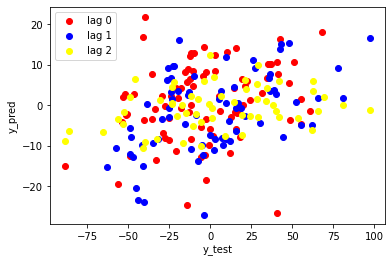

In [85]:
#scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test_0,y_pred_0, c ="red", label="lag 0")
plt.scatter(y_test_1,y_pred_1, c ="blue", label="lag 1")
plt.scatter(y_test_2,y_pred_2, c ="yellow", label="lag 2")
plt.legend(loc="upper left")
plt.show()

Statistically lag 2 shows the best results as the points are more closer (i.e less scattered ) on the straight line line y_test = y_predicted.

## SVM

In [86]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

#lag0
param_grid={'kernel':['rbf','linear','sigmoid','poly']}
Grid=GridSearchCV(SVR(),param_grid)                    #Grid search to find the best parameters
Grid.fit(X_train_0,y_train_0)
y_pred_0 = Grid.predict(X_test_0)
rmse_0=np.sqrt(mean_squared_error(y_pred_0,y_test_0))
print("Grid_0_details")
print(Grid.best_params_)
print(Grid.score(X_test_0,y_test_0))

#lag1
param_grid={'kernel':['rbf','linear','sigmoid','poly']}
Grid=GridSearchCV(SVR(),param_grid)                   #Grid search to find the best parameters
Grid.fit(X_train_1,y_train_1)
y_pred_1 = Grid.predict(X_test_1)
rmse_1=np.sqrt(mean_squared_error(y_pred_1,y_test_1))#root mean square error
print("Grid_1_details")
print(Grid.best_params_)
print(Grid.score(X_test_1,y_test_1))

#lag2
param_grid={'kernel':['rbf','linear','sigmoid','poly']}
Grid=GridSearchCV(SVR(),param_grid)                   #Grid search to find the best parameters
Grid.fit(X_train_2,y_train_2)
y_pred_2 = Grid.predict(X_test_2)
rmse_2=np.sqrt(mean_squared_error(y_pred_2,y_test_2))#root mean square error
print("Grid_2_details")
print(Grid.best_params_)
print(Grid.score(X_test_2,y_test_2))

Grid_0_details
{'kernel': 'linear'}
0.04048870075762445
Grid_1_details
{'kernel': 'linear'}
0.17321122742564243
Grid_2_details
{'kernel': 'sigmoid'}
0.051797171349492244


In [82]:
#printing in a table format
print('Lag 0: Root mean square error =', rmse_0,'\n=======================================================================')
cols = ['true ISMR values', 'predicted ISMR values']
d = (np.column_stack((y_test_0,y_pred_0)))
(r,c) = np.shape(d)
index=list(range(0, r))
df = pd.DataFrame(d,index,cols)
print(df)
print('Lag 1: Root mean square error =', rmse_1,'\n=======================================================================')
d = (np.column_stack((y_test_1,y_pred_1)))
(r,c) = np.shape(d)
index=list(range(0, r))
df = pd.DataFrame(d,index,cols)
print(df)
print('Lag 2: Root mean square error =', rmse_2,'\n=======================================================================')
d = (np.column_stack((y_test_2,y_pred_2)))
(r,c) = np.shape(d)
index=list(range(0, r))
df = pd.DataFrame(d,index,cols)
print(df)

Lag 0: Root mean square error = 30.865196173206563 
    true ISMR values  predicted ISMR values
0          37.203499              10.251194
1          -5.607690              -5.258919
2          42.673698              16.430285
3          -2.419840               8.239488
4         -56.140301             -19.453637
..               ...                    ...
82         12.814500              -2.975446
83        -13.100600              -1.640488
84         31.554399               2.990219
85        -20.660601             -11.326198
86         18.277399              -7.799013

[87 rows x 2 columns]
Lag 1: Root mean square error = 32.462529261479006 
    true ISMR values  predicted ISMR values
0         -48.984200             -12.012507
1         -40.429798             -23.743846
2          52.280998               0.736543
3           2.221670             -11.035875
4         -31.613400              -8.299701
..               ...                    ...
68         36.594799               3.

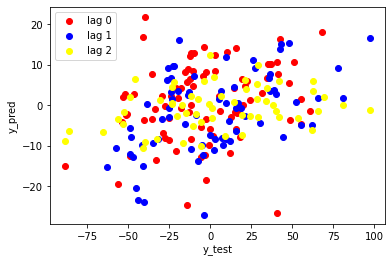

In [83]:
#scatterplot
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.scatter(y_test_0,y_pred_0, c ="red", label="lag 0")
plt.scatter(y_test_1,y_pred_1, c ="blue", label="lag 1")
plt.scatter(y_test_2,y_pred_2, c ="yellow", label="lag 2")
plt.legend(loc="upper left")
plt.show()

Statistically lag 2 shows the best results as the points are more closer (i.e less scattered ) on the straight line line y_test = y_predicted.